In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os 

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [24]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | We bought tickets for a Geneva-...
1,✅ Trip Verified | Appalling service with fai...
2,✅ Trip Verified | British Airways charge you f...
3,✅ Trip Verified | What is wrong with you guys?...
4,✅ Trip Verified | We booked two business cla...


In [5]:
df = pd.DataFrame(reviews)
df

,0
0,Not Verified | We bought tickets for a Geneva-...
1,✅ Trip Verified | Appalling service with fai...
2,✅ Trip Verified | British Airways charge you f...
3,✅ Trip Verified | What is wrong with you guys?...
4,✅ Trip Verified | We booked two business cla...
...,...
995,✅ Trip Verified | Johannesburg to Cape Town re...
996,✅ Trip Verified | Grenada to Gatwick. Having ...
997,✅ Trip Verified | Prague to London. A two hou...
998,✅ Trip Verified | London to Dubai. Lately I a...


In [25]:
df = pd.DataFrame({"Review":reviews})
df

,Review
0,Not Verified | We bought tickets for a Geneva-...
1,✅ Trip Verified | Appalling service with fai...
2,✅ Trip Verified | British Airways charge you f...
3,✅ Trip Verified | What is wrong with you guys?...
4,✅ Trip Verified | We booked two business cla...
...,...
995,✅ Trip Verified | Johannesburg to Cape Town re...
996,✅ Trip Verified | Grenada to Gatwick. Having ...
997,✅ Trip Verified | Prague to London. A two hou...
998,✅ Trip Verified | London to Dubai. Lately I a...


In [26]:
df[['Verified', 'Review']] = df['Review'].str.split('|', n=1, expand=True)
df = df[['Verified','Review']] # Reorder
df.head()

,Verified,Review
0,Not Verified,"We bought tickets for a Geneva-London flight,..."
1,✅ Trip Verified,Appalling service with failing defective fl...
2,✅ Trip Verified,British Airways charge you for the pleasure o...
3,✅ Trip Verified,What is wrong with you guys? People pay lots ...
4,✅ Trip Verified,We booked two business class seat with Brit...


In [27]:
df['Verified'] = df['Verified'].str.replace('✅', '', regex=True)
df

,Verified,Review
0,Not Verified,"We bought tickets for a Geneva-London flight,..."
1,Trip Verified,Appalling service with failing defective fl...
2,Trip Verified,British Airways charge you for the pleasure o...
3,Trip Verified,What is wrong with you guys? People pay lots ...
4,Trip Verified,We booked two business class seat with Brit...
...,...,...
995,Trip Verified,Johannesburg to Cape Town return. This flight...
996,Trip Verified,Grenada to Gatwick. Having flown with BA on ...
997,Trip Verified,Prague to London. A two hour flight on 27th ...
998,Trip Verified,London to Dubai. Lately I am frequently flyi...


In [28]:
import matplotlib.pyplot as plt


In [29]:
review_counts = df['Verified'].value_counts()

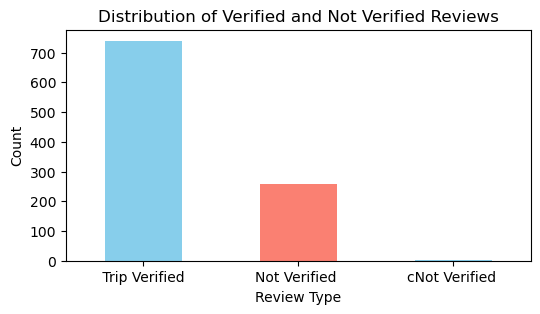

In [34]:
plt.figure(figsize=(6,3))  # Adjust figure size if needed
review_counts.plot(kind='bar', color=['skyblue', 'salmon']) 
plt.title('Distribution of Verified and Not Verified Reviews')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()